In [1]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# 독립표본 t검정: 표본으로부터 측정된 분산, 표준편차를 이용하여 두 모집단의 평균의 차이를 검정하는 방법
def independent_ttest(data1, data2):
    # 평균값
    mean1, mean2 = mean(data1), mean(data2)
    # 모집단이 큰 경우 표본을 여러번 추출하게 되는데 추출할 때마다 표본들의 평균값이 달라지게 됨, 
    # 표본평균의 표준편차를 표준오차라고 함(sem 함수로 계산) 
    se1, se2 = sem(data1), sem(data2)
    # 표본간의 차이에 대한 표준오차 계산
    sed = sqrt(se1**2 + se2**2)
    # t 통계량(t statistics) 계산
    t_stat = (mean1 - mean2) / sed
    # 자유도(degrees of freedom) 계산(샘플개수-1)
    # 표본수가 n개인 표본이 있다면 표본값 중 자유롭게 변할 수 있는 값은 n-1개의 표본
    # 시험 3회 응시, 평균 80점이라고 할 때 2개 시험에서 70점,90점을 받았다면 나머지 1개는 80점이 되어야 함, 
    # 표본수가 3이고 자유롭게 변할 수 있는 값은 2
    df = len(data1) + len(data2) - 2
    # p-value 계산(cdf 누적분포함수)
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    return t_stat, p

In [2]:
#독립변수(입력값)
X=[3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.9, 3.2] #전기생산량
#종속변수(출력값)
y=[2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53] #전기사용량

# 95% 신뢰수준
alpha = 0.05
t_stat, p = independent_ttest(X, y)
print('t=%.3f, p-value=%f' % (t_stat, p))

if p > alpha:
    print('p-value > 0.05, 귀무가설 채택, 대립가설 기각')
else:
    print('p-value < 0.05, 귀무가설 기각, 대립가설 채택')

t=4.752, p-value=0.000096
p-value < 0.05, 귀무가설 기각, 대립가설 채택


[-8.         -7.83838384 -7.67676768 -7.51515152 -7.35353535]
[3.39767312e-06 4.95353201e-06 7.17671574e-06 1.03327820e-05
 1.47840373e-05]


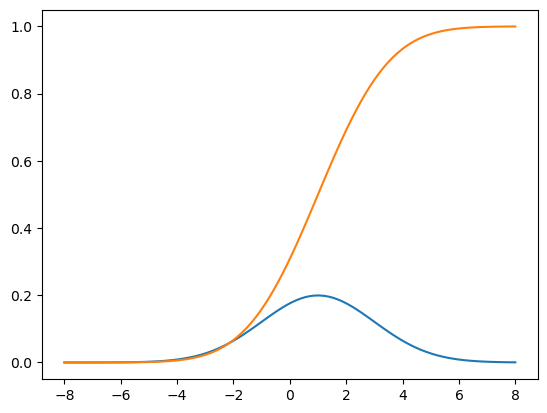

In [3]:
# 참고
# 확률분포: 어떤 사건에 어느 정도의 확률이 할당되었는지를 묘사한 것
# 누적분포함수(cumulative distribution function))
# 모든 사건에 대해 구간을 정의하기가 어려우므로 시작점을 마이너스무한대로 설정하고
# 마이너스무한대 ~ -1, 마이너스무한대 ~ 0, 마이너스무한대 ~ 1 식으로 구간을 정의하는 방법
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

xx = np.linspace(-8, 8, 100)
# print(xx)
# 정규분포 생성, loc 분포의 기대값, scale 분포의 표준편차
rv = sp.stats.norm(loc=1, scale=2)
# 누적분포함수
cdf = rv.cdf(xx)
# 확률밀도함수(누적분포함수를 미분한 함수)
pdf = rv.pdf(xx)

print(xx[:5])
print(cdf[:5])
plt.plot(xx, pdf)
plt.plot(xx, cdf)
plt.show()